In [1]:
library(tidymodels)
library(tidyverse)

data <- read_csv("https://raw.githubusercontent.com/nkim0/group_project/main/knowledge_data.csv", show_col_types = FALSE)

── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.8
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.3     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.0
✔ infer        1.0.5     ✔ tune         1.1.2
✔ modeldata    1.2.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.2.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Use suppressPackageStartupMessages() to eliminate package startup messages

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.4
✔ lubridate 1.9.3     ✔ stringr   1.5.0
── Conflicts ────────────────────────────────────────── tidyverse_co

# Group proposal of knowledge level prediction based on user's study time and exam performance


# Introduction:A user knowledge modeling system is a powerful tool with strong applications for exploring the knowledge of the target audience and creating efficient, personalized systems. It allows for individual content personalization, especially in online-learning environments (Kahraman et al., 2013). Our goal for this project is to predict the user’s knowledge level to optimize web-based adaptive learning environments by addressing the following question: 
**Can we predict the knowledge level of the user based on their degree of study time and exam performance for goal object materials?**

To answer the question, we will be using the ‘User Knowledge Modeling’ dataset. In this dataset, a user’s knowledge status about the subject of electrical DC machines is classified as very low, low, middle, and high. It also includes variables that determine the degree of study time, repetition number, exam performance for related and goal object materials. We will use the degree of study time and exam performance as predictors for the user’s knowledge level.



# Preliminary exploratory data analysis:
For data wrangling, we selected the columns STG and PEG as predictors. We created a summary table of the knowledge level to ensure categories are at relatively similar amounts for balanced classification. Additionally, no data points had missing values.

In [2]:
set.seed(22)

tidy_data_all <- data|>
    select(STG, SCG, STR, LPR, PEG, UNS) |>
    na.omit()

tidy_data_all$UNS <- factor(tidy_data_all$UNS, levels=c("very_low", "Low", "Middle", "High"))

tidy_data <- tidy_data_all |>
    select(STG, PEG, UNS) |>
    filter(UNS!="very_low")

knowledge_split <- initial_split(tidy_data, prop = 0.75, strata = UNS)
knowledge_train <- training(knowledge_split)
knowledge_test <- testing(knowledge_split)

In [3]:
knowledge_prediction_summary <- knowledge_train |>
    group_by(UNS) |>
    summarize(count = n())

mean_table <- knowledge_train |>
    select(STG, PEG) |>
    map_df(mean)

mean_table
knowledge_prediction_summary 

STG,PEG
<dbl>,<dbl>
0.3706286,0.4933714


UNS,count
<fct>,<int>
Low,62
Middle,66
High,47


We omitted the 'very_low' category from UNS due to low counts and now other categories are at relatively similar counts. Lastly, we plotted the exam performance vs. degree of study time using training data. Each data point's color represents its corresponding knowledge level.

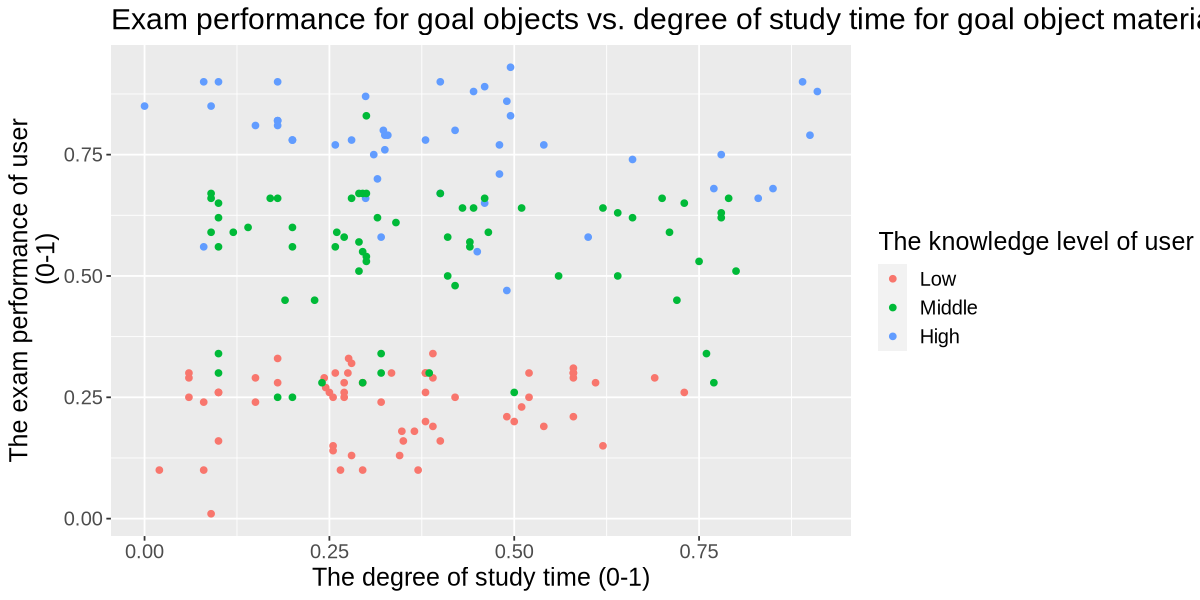

In [4]:
options(repr.plot.height = 5, repr.plot.width = 10)
relation_plot <- knowledge_train |>
    ggplot(aes(x=STG, y=PEG, color=UNS)) +
    geom_point() +
    ggtitle("Exam performance for goal objects vs. degree of study time for goal object material") +
    labs(x="The degree of study time (0-1)", y="The exam performance of user
         (0-1)", color="The knowledge level of user") +
    theme(text=element_text(size=15))

prime_plot <- knowledge_train |> 
    ggplot(aes(fill=UNS)) + labs(fill="The knowledge level of user") + theme(text=element_text(size=15))

STG_distribution <- prime_plot +
    geom_histogram(aes(x=STG), bins=12) +
    ggtitle("Distribution of degree of study time for goal object material") +
    labs(x="Degree of study time (0-1)", y="frequency")

PEG_distribution <- prime_plot +
    geom_histogram(aes(x=STG), bins=12) +
    ggtitle("Distribution of exam performance of user for goal objects") +
    labs(x="Exam performance (0-1)", y="frequency")

relation_plot
# STG_distribution
# PEG_distribution

# Methods:
For the data analysis, we'll employ the k-nearest neighbors classification method to predict knowledge levels based on exam performance and study time. We will split the data into training and testing sets using a 75/25 split. The model’s recipe will take STG and PEG as predictors and predict the knowledge level. We will incorporate vfold and tune functions in our workflow to find the optimal k value for accuracy by plotting the accuracy vs. k value. Then, we will input the optimal k value into the final model, fit our data, and finally, predict test data. To visually represent the model's accuracy, we'll create a bar graph of knowledge levels with two fill options: correct and incorrect predictions.


# Expected outcomes and significance:
We expect to find a student's knowledge level using study time and exam performance (Kahraman et al., 2013). They predict how successfully students gained knowledge and preparation for next studies on the subject. Results will impact the level of completion of electrical DC machine exams. Moreover, it identifies students who need extra studies by determining the minimum score before moving. These outcomes will generate questions of what is the minimum passing score for students to successfully gain knowledge, using data of performance in the next exams and outcomes we obtained. Doing poorly on the next step’s exam means studies of previous goal objects were not fully knowledgeable. Therefore, setting the standard passing score can be used for future related exams to prove the promotion of the next studies based on their knowledge level.



# References:
Kahraman,Hamdi, Colak,Ilhami, and Sagiroglu,Seref. (2013). User Knowledge Modeling. UCI Machine Learning Repository. https://doi.org/10.24432/C5231X.

Kahraman, H. T., Sagiroglu, S., & Colak, I. (2013). The development of intuitive knowledge classifier and the modeling of domain dependent data. Knowledge-Based Systems, 37, 283–295. https://doi.org/10.1016/j.knosys.2012.08.009

Liu, M. (2022). The relationship between students’ study time and academic performance and its practical significance. BCP Education & Psychology, 7, 412–415. https://doi.org/10.54691/bcpep.v7i.269691337